# World Happiness Report – Data Visualization (2019)

**Objective:** Explore and visualize the World Happiness 2019 dataset to understand how happiness relates to:
- continent,
- GDP per capita,
- social support,
- healthy life expectancy,
- freedom of life choices,
- perceptions of corruption.

**Tasks:**
1. Happiness Score by Continent (bar chart)
2. GDP per Capita vs Happiness Score (scatter plot)
3. Social Support: Top 10 vs Bottom 10 countries (box plot)
4. Choropleth map of happiness score for one continent (Europe)
5. Two additional meaningful visualizations

> **Note:** Each section follows the pattern **Question → Plot → Interpretation**.


In [1]:
import pandas as pd

In [2]:

df_happiness_2019 = pd.read_csv("./assignment_support/happiness_2019_full_dataset.csv")
df_happiness_2019.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,continent
0,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe


## Happiness Score by Continent

**Goal:**  
Compare the average happiness score across continents.

**Why bar chart?**  
- Good for comparing aggregated values (mean happiness)
- Easy to interpret continent-wise differences


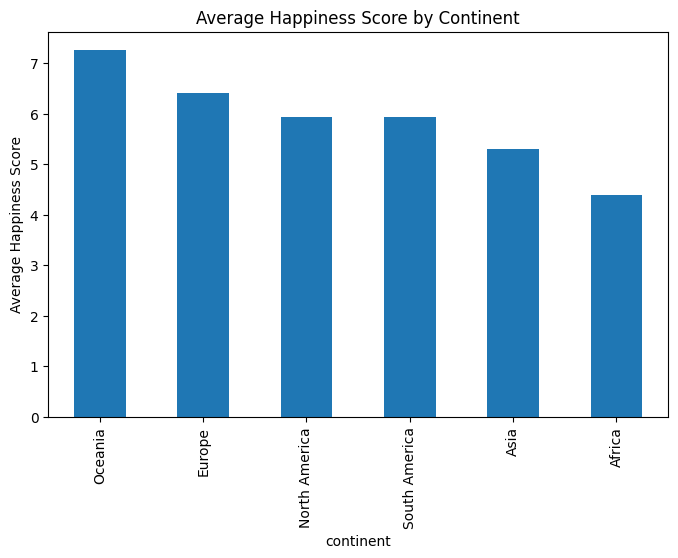

In [3]:
import matplotlib.pyplot as plt

continent_avg = (
    df_happiness_2019
    .groupby("continent")["happiness_score"]
    .mean()
    .sort_values(ascending=False)
)

continent_avg.plot(kind="bar", figsize=(8,5))
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Continent")
plt.show()

**Interpretation:**  
- Continents differ clearly in average happiness.  
- Higher averages often appear in more economically developed regions, while lower averages appear in regions with lower GDP and lower social indicators.  
- This suggests strong regional differences in overall well‑being.

## GDP per Capita vs Happiness Score

**Goal:**  
Examine the relationship between economic wealth and happiness.

**Why scatter plot?**  
- Shows relationship between two continuous variables
- Helps visually identify correlation patterns


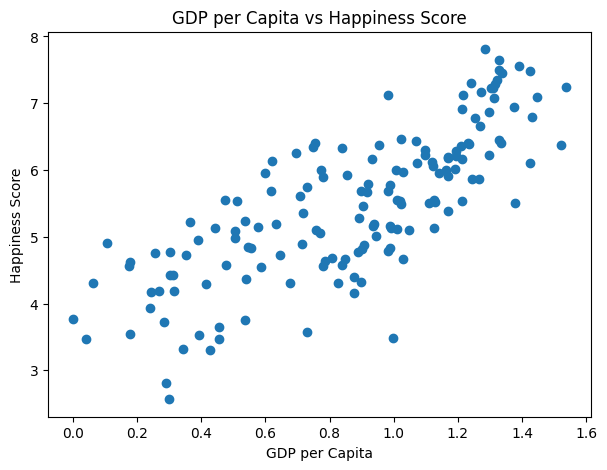

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(
    df_happiness_2019["gdp_per_capita"],
    df_happiness_2019["happiness_score"]
)

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP per Capita vs Happiness Score")
plt.show()


**Interpretation:**  
- A positive relationship is visible: countries with higher GDP per capita tend to have higher happiness scores.  
- The spread indicates GDP is **not the only factor**; social and institutional variables also matter.

## Social Support Comparison

**Goal:**  
Compare social support levels between:
- Top 10 happiest countries
- Bottom 10 least happy countries

**Why box plot?**  
- Shows distribution, median, and spread
- Ideal for comparing two groups


C:\Users\acer\AppData\Local\Temp\ipykernel_11456\3495082025.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Top 10 Happiest", "Bottom 10 Least Happy"])


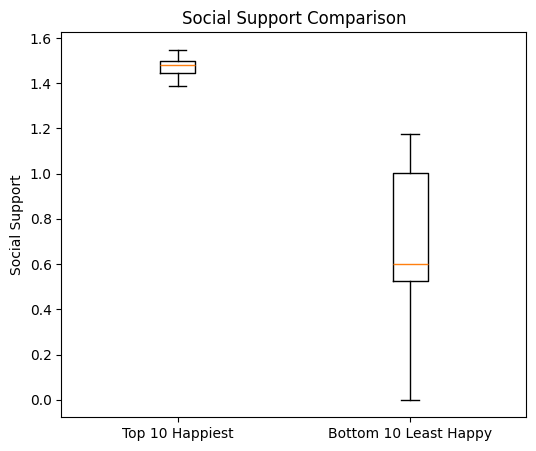

In [5]:
top_10 = df_happiness_2019.nlargest(10, "happiness_score")
bottom_10 = df_happiness_2019.nsmallest(10, "happiness_score")

data = [
    top_10["social_support"],
    bottom_10["social_support"]
]

plt.figure(figsize=(6,5))
plt.boxplot(data, labels=["Top 10 Happiest", "Bottom 10 Least Happy"])
plt.ylabel("Social Support")
plt.title("Social Support Comparison")
plt.show()


**Interpretation:**  
- The Top 10 happiest countries typically show **higher median social support**.  
- The Bottom 10 least happy countries show lower social support and often greater variability.  
- This supports the idea that strong social networks are linked to higher well‑being.

## Choropleth Map of Happiness Score (Europe)

**Goal:**  
Visualize how happiness scores vary geographically within one continent.

**Why choropleth map?**  
- Shows spatial distribution
- Highlights regional patterns


In [6]:
import plotly.express as px

europe_df = df_happiness_2019[df_happiness_2019["continent"] == "Europe"]

fig = px.choropleth(
    europe_df,
    locations="country",
    locationmode="country names",
    color="happiness_score",
    color_continuous_scale="Viridis",
    title="Happiness Score in Europe"
)

fig.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_11456\125629143.py:5: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


**Interpretation:**  
- Within Europe, happiness scores vary by country.  
- Higher scores are often concentrated in Northern/Western Europe, while lower scores appear more in parts of Eastern/Southern Europe (general pattern).

## Life Expectancy vs Happiness Score

**Goal:**  
Analyze whether healthier populations tend to be happier.


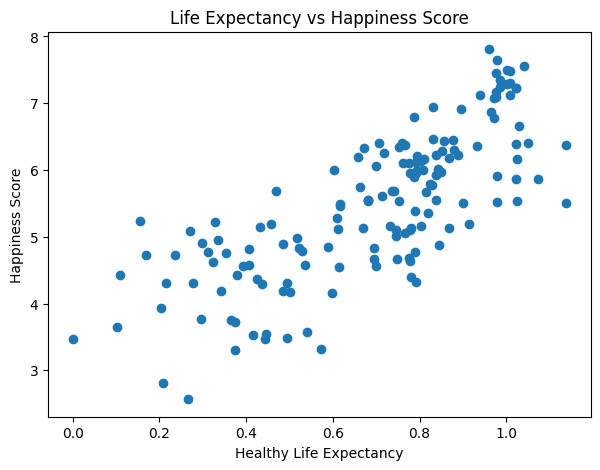

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(
    df_happiness_2019["healthy_life_expectancy"],
    df_happiness_2019["happiness_score"]
)

plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Happiness Score")
plt.title("Life Expectancy vs Happiness Score")
plt.show()


**Interpretation:**  
- Countries with higher healthy life expectancy tend to have higher happiness scores.  
- Health is strongly associated with overall quality of life and well‑being.

## Perception of Corruption vs Happiness Score

**Goal:**  
Understand how perceived corruption relates to happiness.


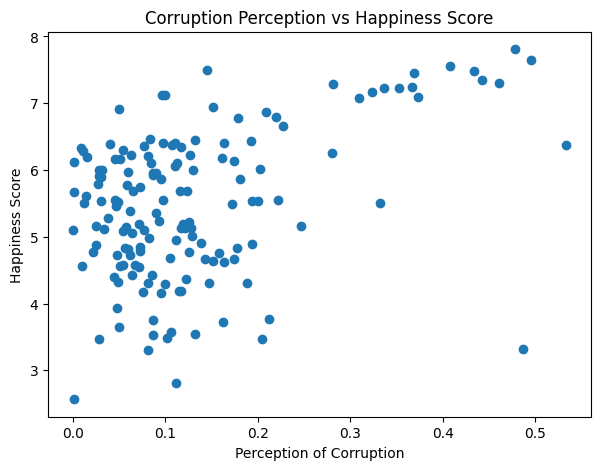

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(
    df_happiness_2019["perceptions_corruption"],
    df_happiness_2019["happiness_score"]
)

plt.xlabel("Perception of Corruption")
plt.ylabel("Happiness Score")
plt.title("Corruption Perception vs Happiness Score")
plt.show()


**Interpretation:**  
- Higher perceived corruption is generally associated with lower happiness.  
- Trust in public institutions and lower corruption perceptions appear linked to better societal well‑being.

## Freedom of Life Choices vs Happiness Score (Additional Visualization)

**Question:** Does perceived freedom to make life choices relate to happiness?

**Why this plot?**  
Both variables are continuous, and a scatter plot helps reveal relationships and potential trends.


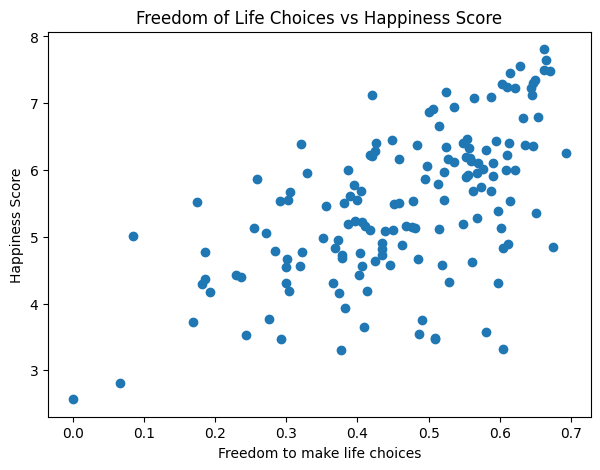

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df_happiness_2019["freedom_life_choices"], df_happiness_2019["happiness_score"])
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Freedom of Life Choices vs Happiness Score")
plt.show()


**Interpretation:**  
- Countries with higher perceived freedom tend to have higher happiness scores.  
- Freedom appears to be an important non‑economic contributor to well‑being.


## Overall Conclusions

- Happiness differs significantly across continents.  
- GDP per capita is positively related to happiness, but it does not explain everything.  
- Social support and healthy life expectancy show strong positive associations with happiness.  
- Higher perceived corruption is associated with lower happiness.  
- Visualizations reveal both global and regional patterns that support these relationships.
